# Library

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the necessary packages and modules
import numpy as np
import os
# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.mobilenet import MobileNet

# Others
import shutil
import random

# Load dataset

In [4]:
# Image Height, Width and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generator flow from directory
train_generator = train_datagen.flow_from_directory(
    directory=r"Dataset/Train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    directory=r"Dataset/Test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

# Check the classes
train_generator.class_indices
validation_generator.class_indices

# Check the shape of the images
train_generator.image_shape
validation_generator.image_shape

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


(224, 224, 3)

In [5]:
# Check GPU
!nvidia-smi

Thu Feb 22 01:48:19 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.52                 Driver Version: 551.52         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   58C    P5             18W /  139W |    1190MiB /   6144MiB |     49%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Modified MobileNet (alpha=0.77)

In [6]:
# Modified model alpha = 0.77
MobileNet_Modified077 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.77)

In [7]:
# Compile the model
MobileNet_Modified077.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Check the model summary
MobileNet_Modified077.summary()

Model: "mobilenet_0.77_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

In [9]:
# Train the model
history_modified077 = MobileNet_Modified077.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 127s 121ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.0721 - val_accuracy: 0.9893
Epoch 2/100
1000/1000 [==============================] - 122s 122ms/step - loss: 0.0162 - accuracy: 0.9954 - val_loss: 0.0655 - val_accuracy: 0.9778
Epoch 3/100
1000/1000 [==============================] - 121s 121ms/step - loss: 0.0164 - accuracy: 0.9956 - val_loss: 0.0607 - val_accuracy: 0.9839
Epoch 4/100
1000/1000 [==============================] - 124s 124ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0172 - val_accuracy: 0.9959
Epoch 5/100
1000/1000 [==============================] - 123s 123ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0079 - val_accuracy: 0.9977
Epoch 6/100
1000/1000 [==============================] - 121s 121ms/step - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.2992 - val_accuracy: 0.8786
Epoch 7/100
1000/1000 [==============================] - 123s 123ms/step - loss: 0.0119 - accuracy: 0.9965

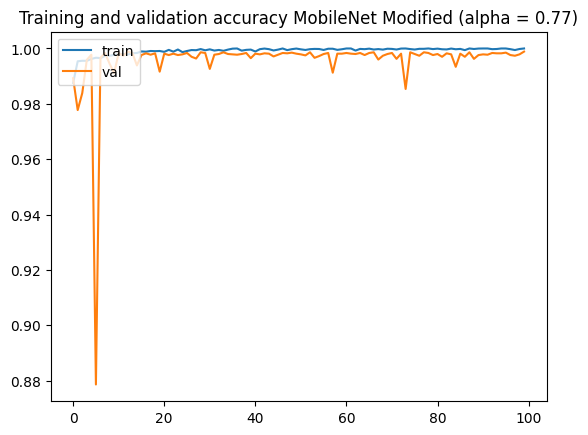

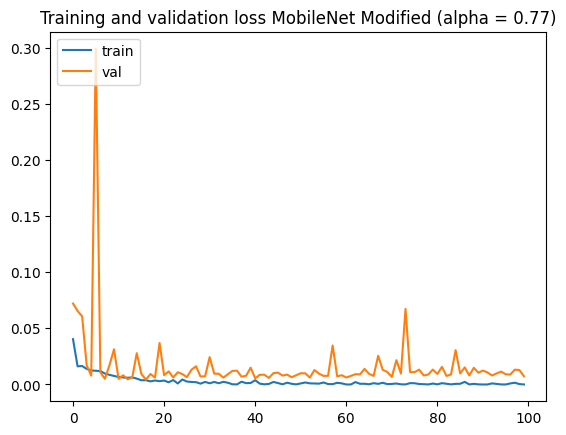

In [10]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified077.history['accuracy']
val_acc  = history_modified077.history['val_accuracy']
loss     = history_modified077.history['loss']
val_loss = history_modified077.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha = 0.77)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha = 0.77)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.76)

In [11]:
# Modified model alpha = 0.76
MobileNet_Modified076 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.76)

In [12]:
# Compile the model
MobileNet_Modified076.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Check the model summary
MobileNet_Modified076.summary()

Model: "mobilenet_0.76_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

In [14]:
# Train the model
history_modified076 = MobileNet_Modified076.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 123s 120ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0441 - val_accuracy: 0.9911
Epoch 2/100
1000/1000 [==============================] - 120s 120ms/step - loss: 0.0194 - accuracy: 0.9950 - val_loss: 0.0246 - val_accuracy: 0.9948
Epoch 3/100
1000/1000 [==============================] - 120s 120ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0097 - val_accuracy: 0.9971
Epoch 4/100
1000/1000 [==============================] - 120s 119ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.0176 - val_accuracy: 0.9944
Epoch 5/100
1000/1000 [==============================] - 119s 119ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.0122 - val_accuracy: 0.9967
Epoch 6/100
1000/1000 [==============================] - 120s 120ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0195 - val_accuracy: 0.9939
Epoch 7/100
1000/1000 [==============================] - 120s 120ms/step - loss: 0.0118 - accuracy: 0.9968

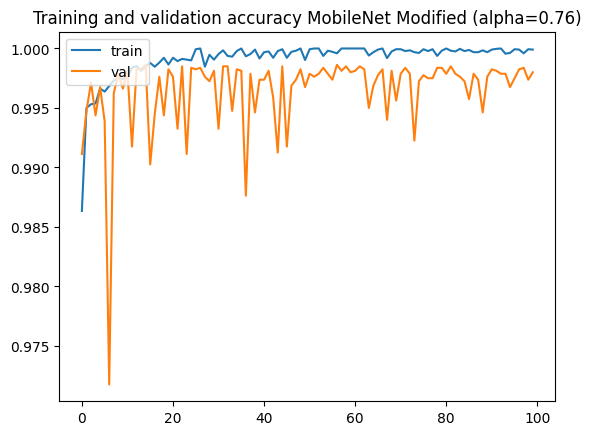

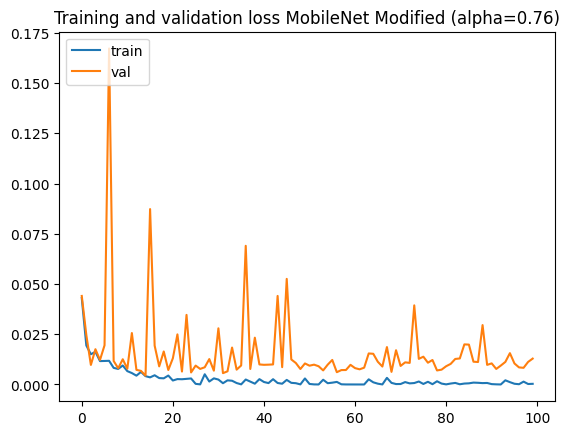

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified076.history['accuracy']
val_acc  = history_modified076.history['val_accuracy']
loss     = history_modified076.history['loss']
val_loss = history_modified076.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.76)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.76)')
plt.legend(['train', 'val'], loc='upper left')

# Save All Model

In [16]:
# Save all the model
MobileNet_Modified077.save('MobileNet_Modified077.h5')
MobileNet_Modified076.save('MobileNet_Modified076.h5')